In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Preprocessing as pp
import glob
import Helpers

# Seaborn Plot Settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal17 = sns.color_palette("Set1", 17)
pal7 = sns.color_palette("Set1", 7)

path_data = '/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/data/'

rootdir_train = path_data + 'train/'
rootdir_test = path_data + 'test/'

train_labels_path = path_data + 'train_label.csv'
test_labels_path = path_data + 'test_label.csv'

train_labels = pd.read_csv(train_labels_path)
test_labels = pd.read_csv(test_labels_path)

files = glob.glob(rootdir_train + '**/*.csv')
files_test = glob.glob(rootdir_test + '**/*.csv')

df = pd.read_csv(path_data + 'features/median.csv', index_col=0, dtype={'area': str})
df_test = pd.read_csv(path_data + 'features_test/median.csv', index_col=0, dtype={'area': str})

# Daten Exploration
## Analyse: Concept drift

Im folgenden untersuchen wir zunächst die train Daten auf data und concept drift. Wir verwenden dazu scatter plots wobei ausgewählte Variablen gegeneinander geplottet werden und die einzelnen Gebiete farblich dargestellt werden.


In [42]:
print(df.columns)
areas = ['004','006','011','015','017','018','020','029','037','046','049','052','057','057','060','064','080']
df_area = df[df['area'] == '064']

df_preprocessed = pp.basic_preprocessing(df.drop(['area','label'], axis = 1))
df_preprocessed = df_preprocessed.join(df['area'])
df_preprocessed = df_preprocessed.join(df['label'])


Index(['area', 'Wheel speed', 'hub angle', 'blade 1 angle', 'blade 2 angle',
       'blade 3 angle', 'pitch motor 1 current', 'pitch motor 2 current',
       'Pitch motor 3 current', 'overspeed sensor speed detection value',
       '5 second yaw against wind average', 'x direction vibration value',
       'y direction vibration value', 'hydraulic brake pressure',
       'Aircraft weather station wind speed', 'wind direction absolute value',
       'atmospheric pressure', 'reactive power control status',
       'inverter grid side current', 'inverter grid side voltage',
       'Inverter grid side active power', 'inverter grid side reactive power',
       'inverter generator side power', 'generator operating frequency',
       'generator current', 'generator torque', 'Inverter inlet temperature',
       'inverter outlet temperature', 'inverter inlet pressure',
       'inverter outlet pressure', 'generator power limit value',
       'reactive power set value', 'Rated hub speed',
       'w

/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/Preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_local[df_local.columns] = scaler.fit_transform(df_local[df_local.columns])
/Users/marvinwoller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/marvinwoller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

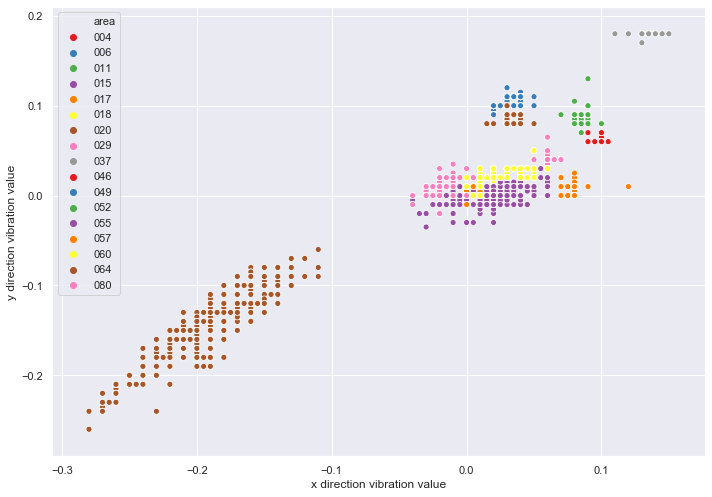

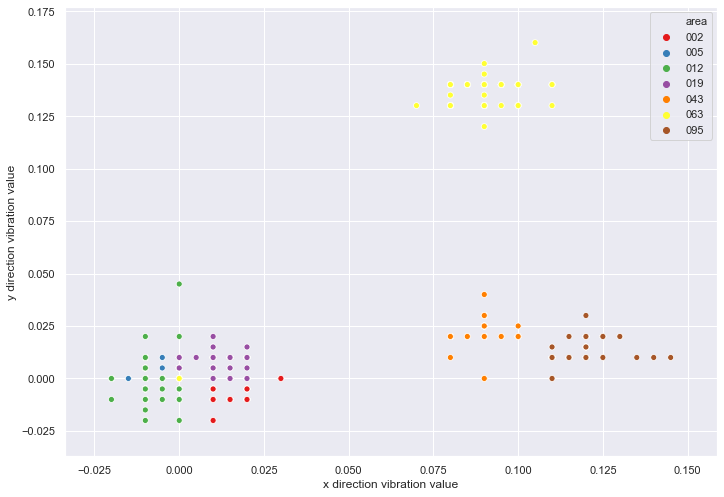

In [77]:
#sns.scatterplot(data=df, x="area", y="y direction vibration value", hue="label")
#plt.show()
plot = sns.scatterplot(data=df, x='x direction vibration value', y='y direction vibration value', hue='area', palette=pal17)
#plot.figure.savefig("/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/data/plots/SC_x direction vibration value_y direction vibration value_area.png")
plt.show()
plot = sns.scatterplot(data=df_test, x='x direction vibration value', y='y direction vibration value', hue='area', palette=pal7)
plt.show()

In dem hier dargestellten Plot werden die Variablen "x direction vibration value" und "y direction vibration value" gegeneinander geplottet. Hier lässt sich gut der concept drift erkennen, da untershiedliche Gebiete, für auf die gleiche Weise gemessene Daten, unterschiedliche Cluster bilden. So ist z.B. eindeutig erkennbar, dass Gebiet 020 stark von den anderen Gebieten abweicht, obwohl eigentlich die selben Variablen gemessen werden.
Die Test Daten unterscheiden sich ebenfalls stark von den Traindaten.

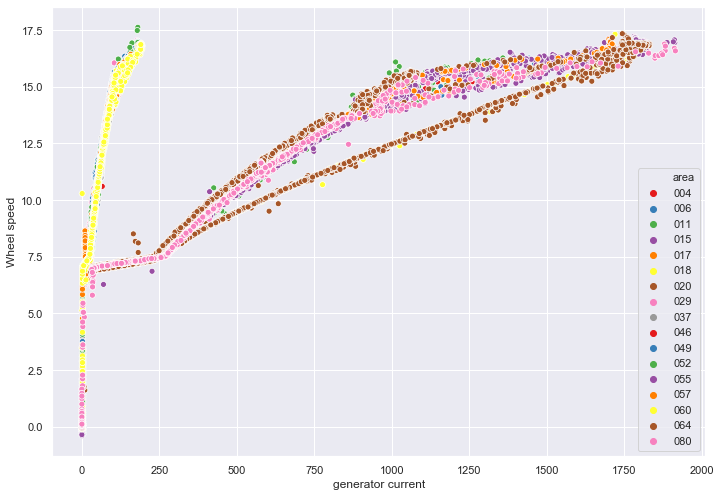

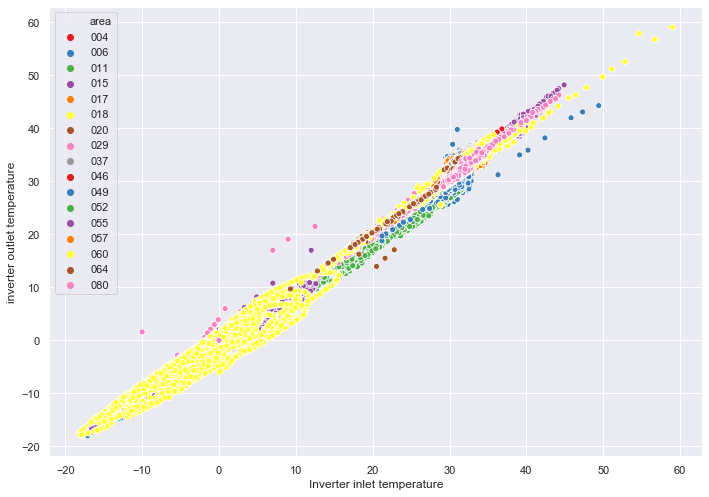

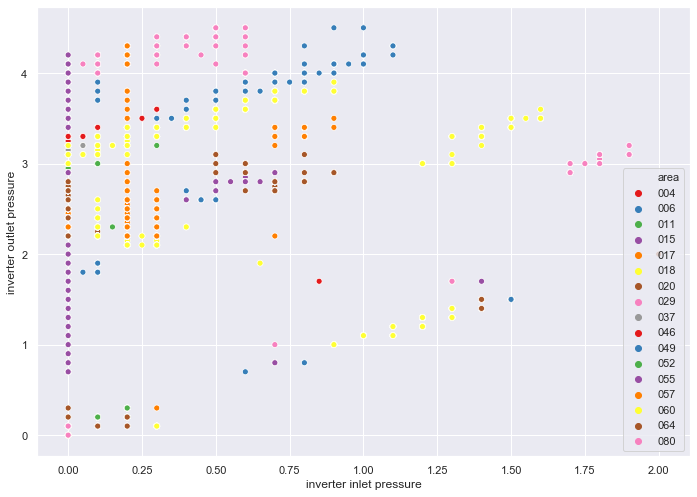

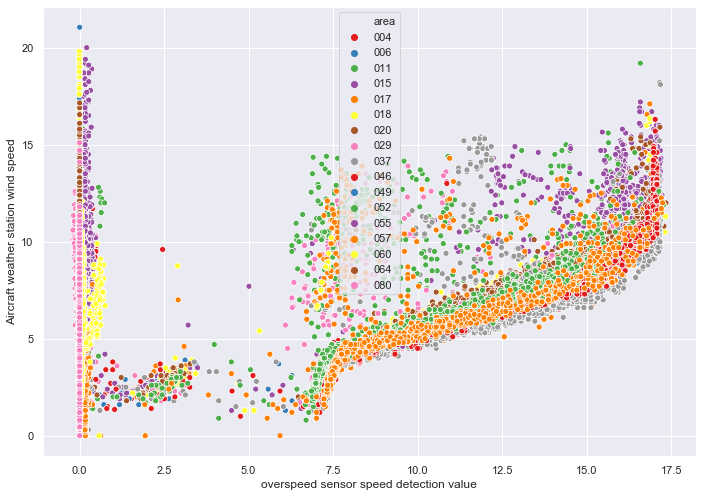

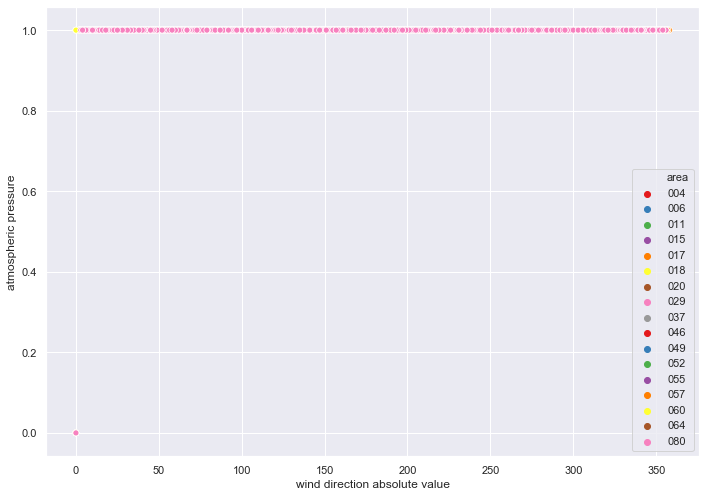

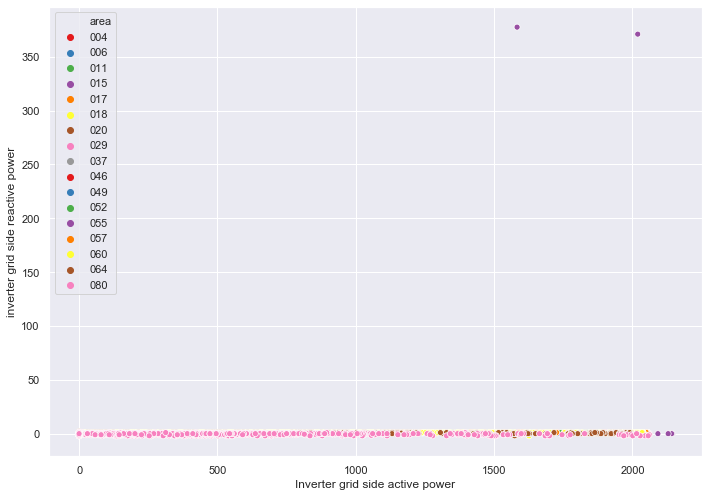

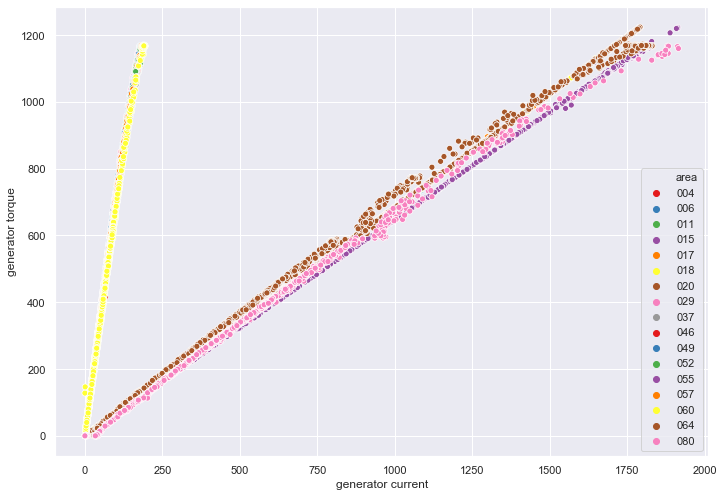

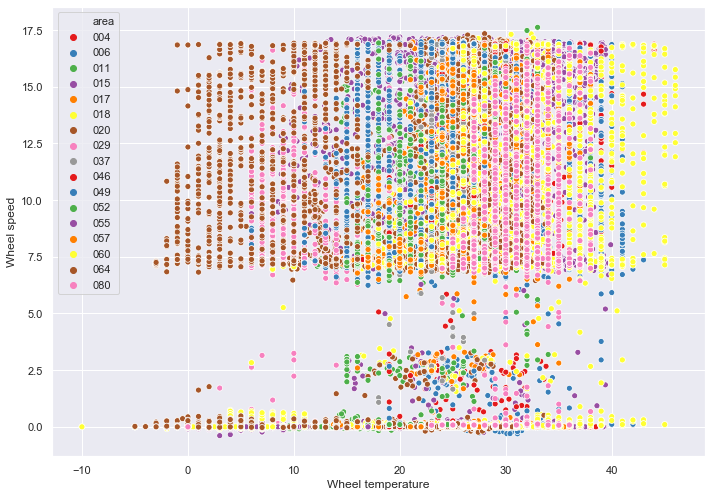

In [78]:
plot = sns.scatterplot(data=df, x="generator current", y="Wheel speed", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="Inverter inlet temperature", y="inverter outlet temperature", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="inverter inlet pressure", y="inverter outlet pressure", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="overspeed sensor speed detection value", y="Aircraft weather station wind speed", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="wind direction absolute value", y="atmospheric pressure", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="Inverter grid side active power", y="inverter grid side reactive power", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="generator current", y="generator torque", hue="area", palette=pal17)
plt.show()
plot = sns.scatterplot(data=df, x="Wheel temperature", y="Wheel speed", hue="area", palette=pal17)
plt.show()
